In [70]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [73]:

# Load the CSV into a DataFrame
df = pd.read_csv("../results/out_tectonic_csv/runtimes.csv", index_col=0)
df = df[df["Round"] != 0]

df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
df = df[df["Config"] != "threshold: 10"]
df = df[df['Input Graph'].isin(["com-amazon.ungraph.txt"])]
# print(df.head())

# Average over rounds
df_avg = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
# print(df_avg.head())

df_one_thread = df_avg[df_avg["Threads"]==1]
df_one_thread = df_one_thread.rename(columns={'Cluster Time': 'Single Thread Time'})
df_one_thread = df_one_thread.drop(columns=["Threads"])
df_avg = df_avg.merge(df_one_thread, on=['Clusterer Name', 'Input Graph', 'Config'])
df_avg["Speedup"] =  df_avg["Single Thread Time"] /df_avg["Cluster Time"] 


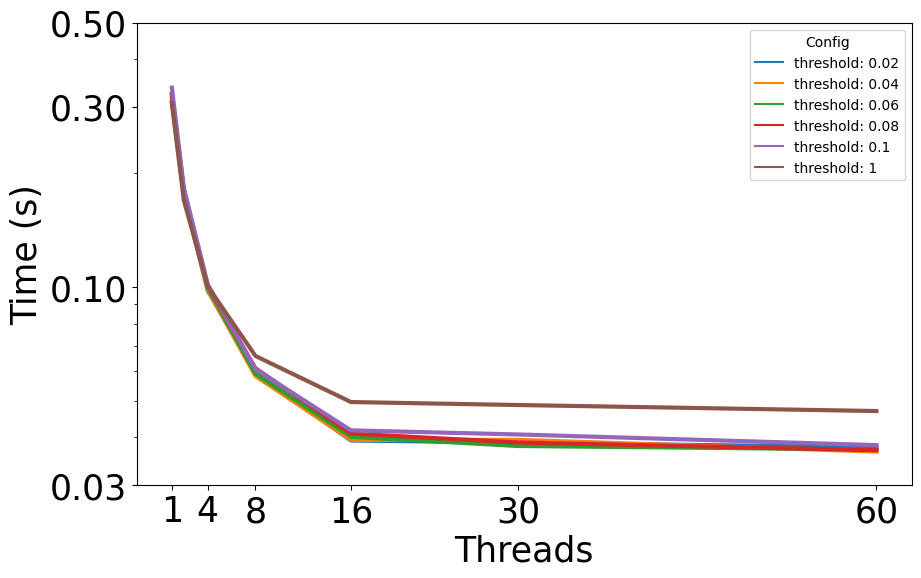

In [74]:

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size

ax = sns.lineplot(data=df_avg, x="Threads", y="Cluster Time", hue="Config", linewidth = 3)

plt.xticks([1, 4, 8, 16, 30, 60])


plt.yscale('log')
plt.yticks([0.03, 0.1, 0.3, 0.5])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(fontsize)
for l in ax.xaxis.get_ticklabels():
    l.set_fontsize(fontsize)

# plt.title("TectonicClusterer")
plt.xlabel("Threads", fontsize = fontsize)
plt.ylabel("Time (s)", fontsize = fontsize)

plt.savefig("../results/out_tectonic_times.pdf")


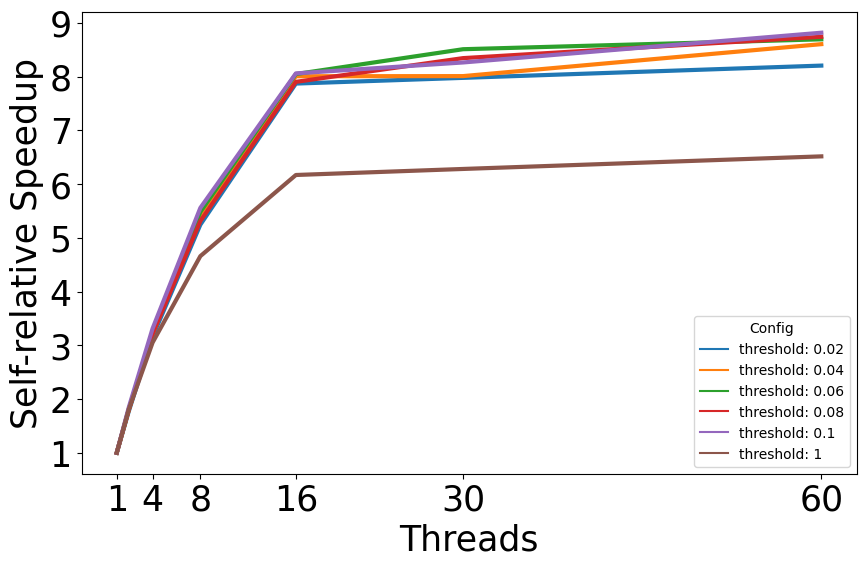

In [75]:
plt.figure(figsize=(10, 6))  # Set the figure size

ax = sns.lineplot(data=df_avg, x="Threads", y="Speedup", hue="Config", linewidth = 3)

plt.xticks([1, 4, 8, 16, 30, 60])


# plt.yscale('log')
# plt.yticks([0.03, 0.1, 0.3, 0.5])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(fontsize)
for l in ax.xaxis.get_ticklabels():
    l.set_fontsize(fontsize)

# plt.title("TectonicClusterer")
plt.xlabel("Threads", fontsize = fontsize)
plt.ylabel("Self-relative Speedup", fontsize = fontsize)

plt.savefig("../results/out_tectonic_speedup.pdf")


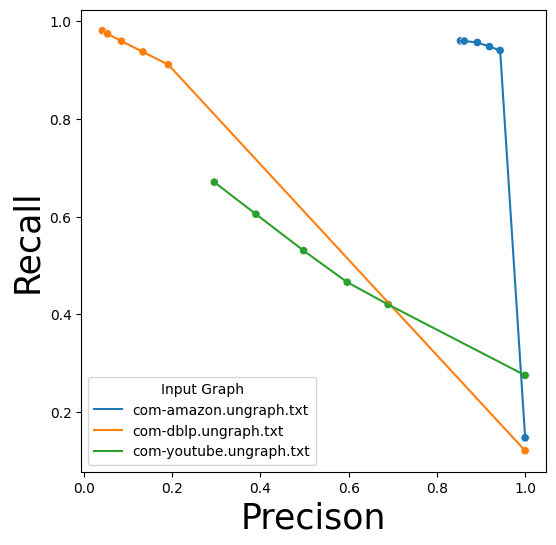

In [76]:
df = pd.read_csv("../results/out_tectonic_csv/stats.csv", index_col=0)
plt.figure(figsize=(6, 6))  # Set the figure size

sns.lineplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", hue="Input Graph")
sns.scatterplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", hue="Input Graph", legend=False)
# plt.title("TectonicClusterer")
plt.xlabel("Precison", fontsize = fontsize)
plt.ylabel("Recall", fontsize = fontsize)

plt.savefig("../results/out_tectonic_precision_recall.pdf")
